# Ablation Analysis

In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
ls ../data/ArchiveII_sample.csv

../data/ArchiveII_sample.csv


In [19]:
train_data = pd.read_csv('../data/ArchiveII_sample.csv')
train_data

,id,sequence,structure,base_pairs,len
0,5s_Mannheimia-succiniciproducens-3,UGGCAGCGAUAGUGCAGUGGACCCACCUAAUUCCAUGCCGAACUUA...,((((((.....((((((((.....((((((.............)))...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",111
1,tmRNA_Geob.meta._CP000148_1-356,GGGGGUGUACAGGUUUCGACGGGGAUAGGAAACUAAAGGUUGCAUG...,(((((((............(((((((.(...((...((((..((((...,"[[1, 352], [2, 351], [3, 350], [4, 349], [5, 3...",356
2,5s_Nitella-flexilis-1,AUGGUACGGUCAUACCACGGCUAAUGCGCCCGAUCCCAUCCGAACU...,(.(..(((((....(((((((......((((((............)...,"[[1, 119], [3, 117], [6, 115], [7, 114], [8, 1...",121
3,srp_Haem.ducr._AE017154,GGAAACCUUCUCGGUCUCUCGCAACGGUGUCUGGUUUACUCGGUCA...,(((((((((((((((.((((((.(((((((((((((...(.(((.....,"[[1, 110], [2, 109], [3, 108], [4, 107], [5, 1...",113
4,RNaseP_SM-A2642,GAGGAAAGUCCGGGCACUAUAGGGCGGAGUGCCAGGUAACACCUGG...,.....(((.(((((((((...<<<<.((((((((((.....)))))...,"[[6, 288], [7, 287], [8, 286], [10, 285], [11,...",290
5,RNaseP_C.trachomatis-D,UCGGAAGAGUAAGGCAACCGCUGAAACCAGCUUUUUAAAAAAGAUG...,.(((((((((..<<<<<<<.(((..((((.(((((...))))).))...,"[[2, 403], [3, 402], [4, 401], [5, 400], [6, 3...",408
6,RNaseP_P.troglodytes,AUAGGGCGGAGGGAAGCUCAUCAGUGGGGCCACGAGCUGAGUGCGU...,................((((.((..(((((........(((((......,"[[17, 283], [18, 282], [19, 281], [20, 280], [...",320
7,5s_Halococcus-morrhuae-2,UUAAGGCGGCCACAGCGGCGGGGCGACUCCCGUACCCAUCCCGAAC...,((......((....(((((((......((((((................,"[[1, 122], [2, 121], [9, 115], [10, 114], [15,...",125
8,5s_Palmaria-palmata-1,ACAUGCGGCCAUAGUGCAGGAACAUGCGCCGAAACCCAUCCCGAAU...,(((((((((....((((.(((......((((((................,"[[1, 120], [2, 119], [3, 118], [4, 117], [5, 1...",121
9,tmRNA_Syne.spec._AB003477_1-394,GGGGCUGUAAUGGUUUCGACGUGUUGGUGAAUCCUUCACCGUGAUU...,(((((((............(((((((((.(...(((..(..(..((...,"[[1, 390], [2, 389], [3, 388], [4, 387], [5, 3...",394


In [21]:
ls ../pruebas/ablation/

train_log.csv


In [23]:
ablations_path = '../pruebas/ablation/'
dfs = {}
folders = os.listdir(ablations_path)
for folder in folders:
    # df_temp = pd.read_csv(ablations_path+folder+'/train_log.csv')
    df_temp = pd.read_csv(ablations_path+folder)
    df_temp['ablation'] = folder
    dfs[folder] = df_temp
    
df = pd.DataFrame(columns=df_temp.columns)
for folder in folders:
    df = pd.concat([df, dfs[folder]])  

In [24]:
df

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation
0,0,0.2758,0.0602,0.2788,0.3634,0.0552,train_log.csv
1,1,0.3740,0.0467,0.3956,0.4523,0.0424,train_log.csv
2,2,0.4364,0.0413,0.4771,0.5034,0.0387,train_log.csv
3,3,0.4726,0.0383,0.4999,0.5372,0.0361,train_log.csv
4,4,0.4985,0.0359,0.4996,0.5616,0.0343,train_log.csv
5,5,0.5149,0.0341,0.5352,0.5789,0.0331,train_log.csv
6,6,0.5327,0.0329,0.5401,0.5970,0.0320,train_log.csv
7,7,0.5436,0.0317,0.5346,0.6022,0.0312,train_log.csv
8,8,0.5556,0.0303,0.4998,0.6034,0.0318,train_log.csv
9,9,0.5643,0.0299,0.5858,0.6194,0.0304,train_log.csv


In [8]:
df_last_epoch = df.query('epoch == 5')

## Lost analysis

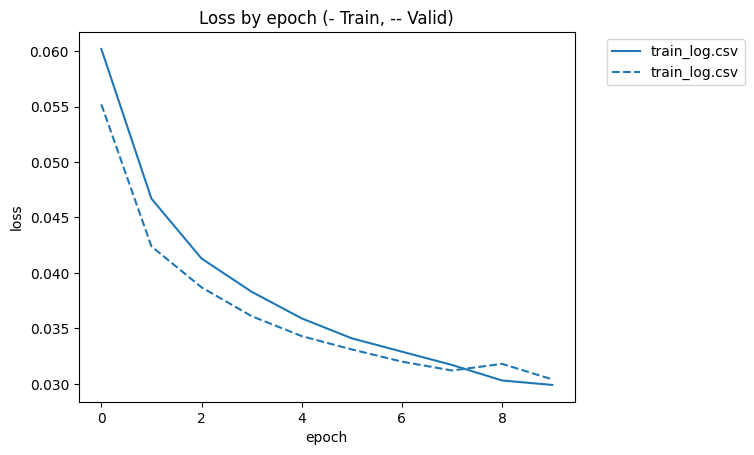

In [25]:
# fig = sns.scatterplot(data=df, x='e', y='train_loss', hue='epoch')
sns.lineplot(data=df, x='epoch', y='train_loss', hue='ablation')
sns.lineplot(data=df, x='epoch', y='valid_loss', hue='ablation', linestyle='--')
plt.ylabel('loss')
plt.title('Loss by epoch (- Train, -- Valid)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


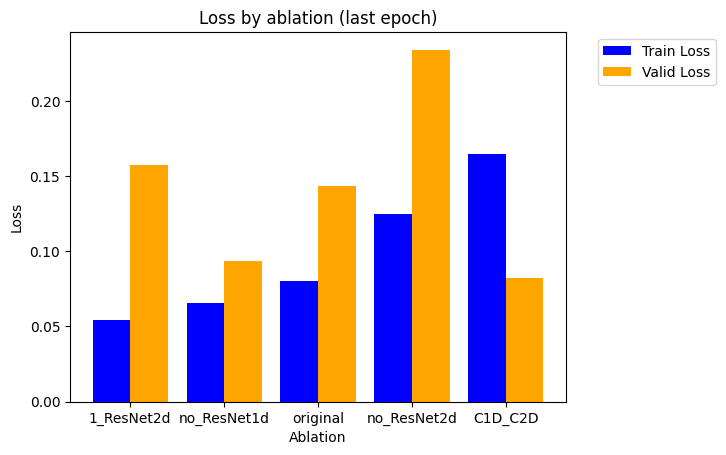

In [10]:
import numpy as np
bar_width = 0.4
index = np.arange(len(df_last_epoch))
df_last_epoch = df_last_epoch.sort_values(by='train_loss')
plt.bar(index - bar_width/2, df_last_epoch['train_loss'], bar_width, color='blue', label='Train Loss')
plt.bar(index + bar_width/2, df_last_epoch['valid_loss'], bar_width, color='orange', label='Valid Loss')

plt.xlabel('Ablation')
plt.ylabel('Loss')
plt.title('Loss by ablation (last epoch)')
plt.xticks(index, df_last_epoch['ablation'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## F1 plots 

Debido a los pocos datos de entrenamiento, grafico los valores de F1 y F1 post. En realidad deberia promediarse teniendo en cuenta mayores conjuntos de test. 

In [11]:
df_last_epoch

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation
5,5,0.1438,0.0544,0.2821,0.2105,0.1578,1_ResNet2d
5,5,0.2540,0.0657,0.0930,0.1825,0.0935,no_ResNet1d
5,5,0.0000,0.0802,0.0000,0.0000,0.1437,original
5,5,0.0000,0.1251,0.0000,0.0000,0.2344,no_ResNet2d
5,5,0.0000,0.1651,0.0000,0.0000,0.0826,C1D_C2D


<Axes: xlabel='ablation', ylabel='valid_f1'>

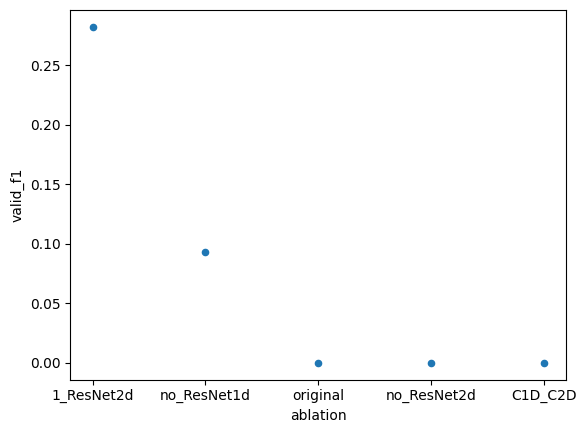

In [12]:
df_last_epoch.plot(x='ablation', y='valid_f1', kind='scatter')

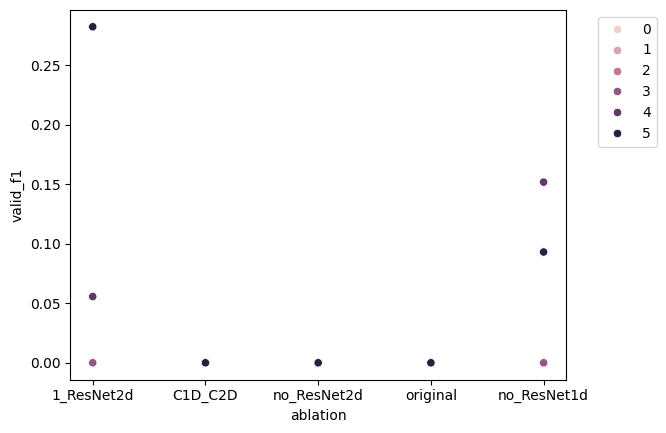

In [13]:

fig = sns.scatterplot(data=df, x='ablation', y='valid_f1', hue='epoch')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


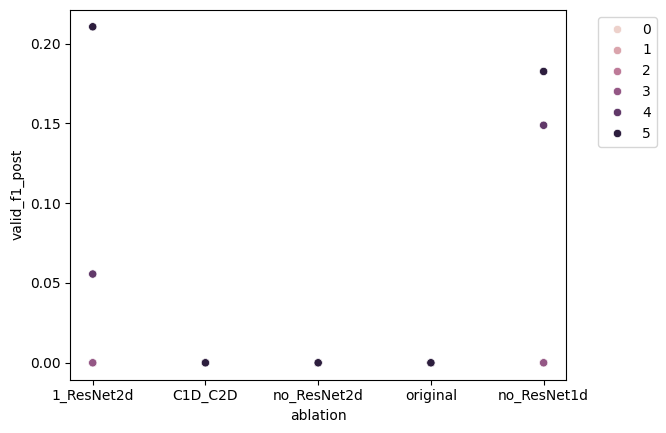

In [14]:
fig = sns.scatterplot(data=df, x='ablation', y='valid_f1_post', hue='epoch')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
